In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')

Data source import complete.


In [ ]:
# SOURCE OF THE DATASET: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from termcolor import colored

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


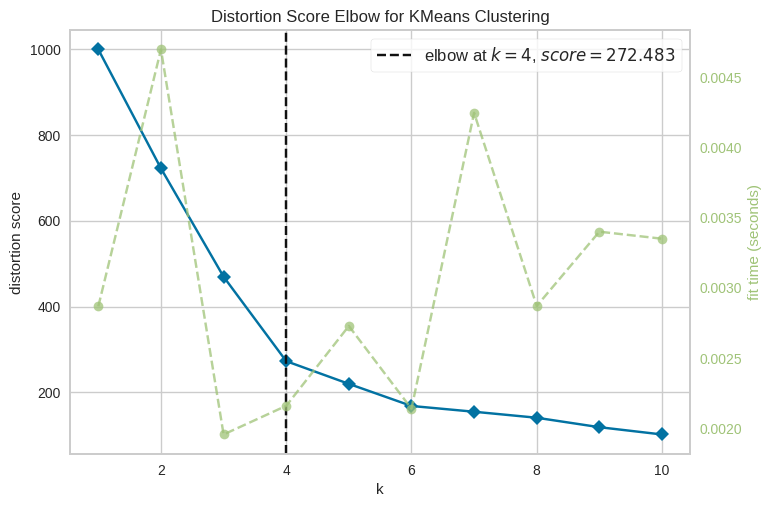

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Use the elbow method to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    float64
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    int64  
 4   Cluster_KMeans          200 non-null    int32  
 5   Cluster_Hierarchical    200 non-null    int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 7.9 KB


<Axes: >

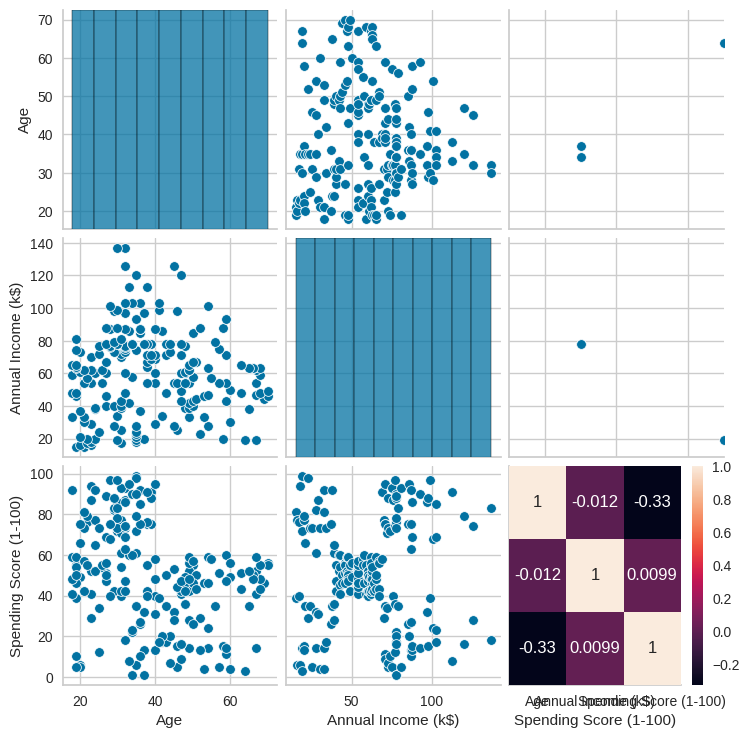

In [ ]:
df.info()
df.describe()
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import kagglehub

# Define the path to the dataset. This variable is defined in the first cell,
# but we include it here for clarity and to make this cell runnable independently.
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')


# Load the data
df = pd.read_csv(f'{vjchoudhary7_customer_segmentation_tutorial_in_python_path}/Mall_Customers.csv')

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

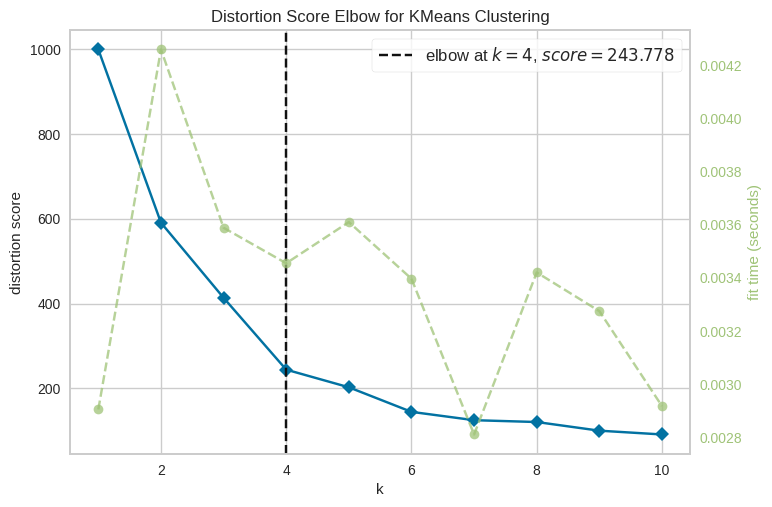

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Use the elbow method to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

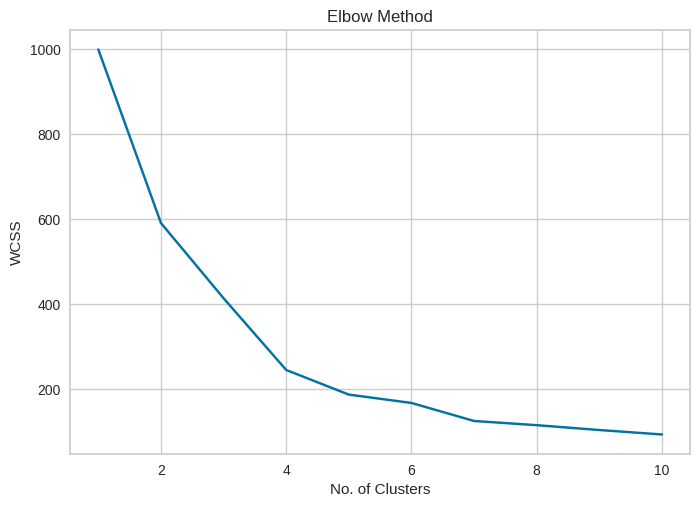

In [ ]:
# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)
df['Cluster_KMeans'] = y_kmeans


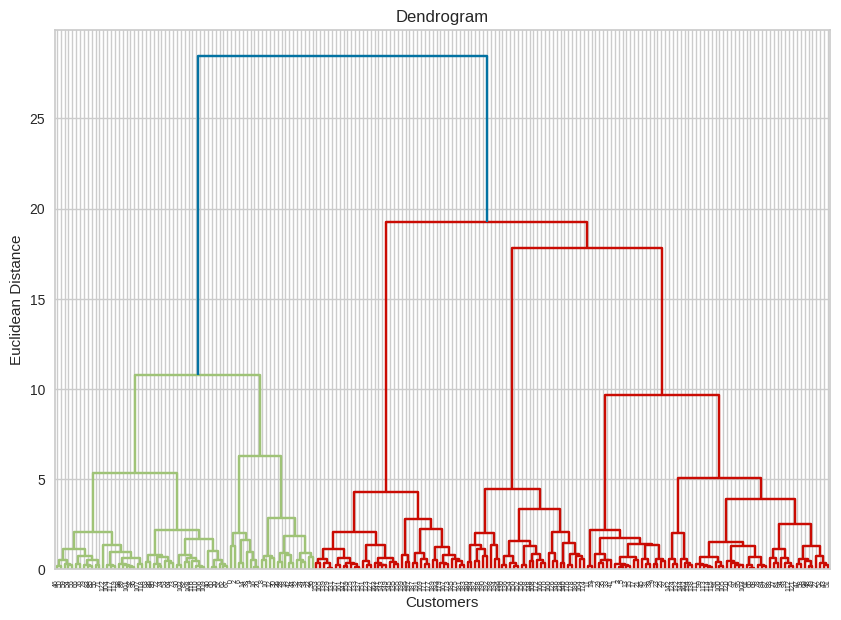

In [ ]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Cut the dendrogram to form 5 clusters
df['Cluster_Hierarchical'] = fcluster(linked, 5, criterion='maxclust')


Text(0.5, 1.0, 'Customer Segmentation using Hierarchical Clustering')

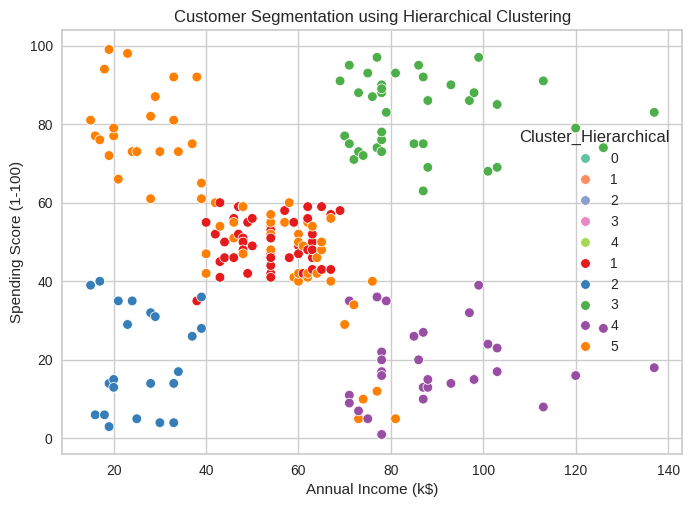

In [ ]:
# KMeans Cluster Visualization
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=df, palette='Set2')
plt.title("Customer Segmentation using K-Means")

# Hierarchical Cluster Visualization
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical', data=df, palette='Set1')
plt.title("Customer Segmentation using Hierarchical Clustering")
